In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("F:/code film/MachinLearn_NeuralNetwork/nuralnetwork/covid.csv")

disease_columns = ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
                   'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'pregnancy', 'pneumonia', 'intubed', 'icu',
                   'contact_other_covid', 'sex', 'patient_type', 'covid_res']

# Replace values in disease-related columns
for col in disease_columns:
    data[col].replace(to_replace=2, value=0, inplace=True)
    data[col].replace(to_replace=97, value=1, inplace=True)

data["date_died"].replace(to_replace="9999-99-99", value=0, inplace=True)
data["contact_other_covid"].replace(to_replace=99, value=1, inplace=True)
data["covid_res"].replace(to_replace=3, value=0, inplace=True)

data.drop(['age', 'sex', 'date_symptoms', 'entry_date', 'patient_type', 'contact_other_covid'], axis=1, inplace=True)
data.fillna(0, inplace=True)

# Split dataset into train and test sets
data_train = data.sample(frac=0.4, random_state=42)
data_test = data.drop(data_train.index)

x_train = data_train[['icu', 'diabetes', 'copd', 'asthma', 
                      'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 
                      'renal_chronic', 'tobacco', 'pregnancy', 'pneumonia']].values
y_train = data_train[['covid_res']].values.flatten()
x_test = data_test[['icu', 'diabetes', 'copd', 'asthma', 
                    'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 
                    'renal_chronic', 'tobacco', 'pregnancy', 'pneumonia']].values
y_test = data_test[['covid_res']].values.flatten()


C:\Users\sa\AppData\Local\Temp\ipykernel_13920\1376429941.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(to_replace=2, value=0, inplace=True)
C:\Users\sa\AppData\Local\Temp\ipykernel_13920\1376429941.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def compute_cost(W, b, x, y):
    m = len(x)
    j = 0
    for i in range(m):
        z = np.dot(x[i], W) + b
        g = sigmoid(z)
        loss = -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)
        j += loss
    return j / m

In [11]:
def compute_gradient(W, b, x, y):
    m = len(x)
    n = len(W)
    D_w = np.zeros_like(W)
    d_b = 0
    for i in range(m):
        z = np.dot(x[i], W) + b
        g = sigmoid(z)
        error = g - y[i]
        D_w += x[i] * error
        d_b += error
    return D_w / m, d_b / m

In [12]:
def gradient_descent(W_0, b_0, x, y, num_iter, alpha):
    cost_history = []
    W = W_0
    b = b_0
    for i in range(num_iter):
        D_w, d_b = compute_gradient(W, b, x, y)
        W -= alpha * D_w
        b -= alpha * d_b
        cost = compute_cost(W, b, x, y)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return W, b, cost_history


In [13]:
def predict_func(W, b, x):
    m = len(x)
    prediction = np.zeros(m)
    for i in range(m):
        z = np.dot(x[i], W) + b
        g = sigmoid(z)
        prediction[i] = 1 if g >= 0.5 else 0
    return prediction

In [14]:
def compute_accuracy(prediction, y):
    return np.mean(prediction == y)


Iteration 0: Cost 0.6915686828419839
Iteration 100: Cost 0.6676092611508051
Iteration 200: Cost 0.664815270003823


C:\Users\sa\AppData\Local\Temp\ipykernel_13920\4200848412.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)
C:\Users\sa\AppData\Local\Temp\ipykernel_13920\4200848412.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  loss = -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)


Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan


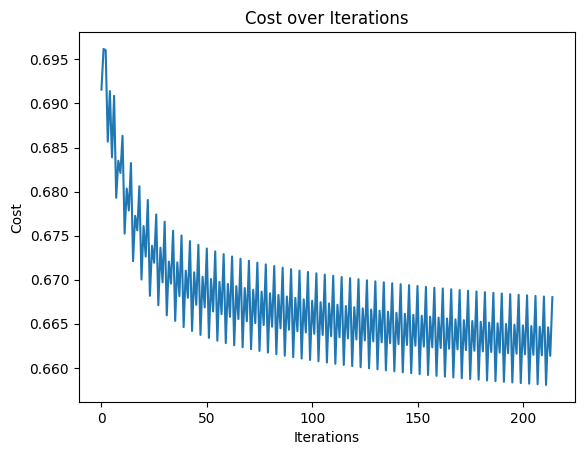

Model Accuracy: 0.6422824971099627


In [15]:
W_0 = np.zeros(x_train.shape[1])
b_0 = 0
alpha = 0.1
num_iter = 1000

# Train the model
W_opt, b_opt, cost_history = gradient_descent(W_0, b_0, x_train, y_train, num_iter, alpha)


plt.plot(range(num_iter), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()


predictions = predict_func(W_opt, b_opt, x_test)
accuracy = compute_accuracy(predictions, y_test)
print(f"Model Accuracy: {accuracy}")